# Project Business Statistics: E-news Express

**Marks: 60**


## Define Problem Statement and Objectives

Context
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Objective
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Explore the dataset and extract insights using Exploratory Data Analysis.

Do the users spend more time on the new landing page than the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

The idea behind answering these questions is to decide whether the new page is effective enough to gather new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

Data Dictionary
user_id - This represents the user ID of the person visiting the website.

group - This represents whether the user belongs to the first group (control) or the second group (treatment).

landing_page - This represents whether the landing page is new or old.

time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

converted - This represents whether the user gets converted to a subscriber of the news portal or not.

language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
# let's look at the first five rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape

(100, 6)

### Observations: 
The dataset contains 100 rows and 6 columns.

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:
The group, landing_page, converted, language_preferred columns are categorical. 
While, user_id and time_spent_on_the_page are numerical.

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe


# Passed a dictionary to astype() function 
df = df.astype({"group":'category',"landing_page":'category', "language_preferred":'category'})

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    object  
 5   language_preferred      100 non-null    category
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 3.1+ KB


### Observations:
The above info on data frame shows the memory usage reduced to 3.1 KB from 4.8 KB.

In [7]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations:
There are no missing values in any of the column

In [8]:
#data statistics
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Observations:
- A total of 100 entries are included in the dataset.
- The average "time spent on the page" is about 5.38 minutes.
- The standard deviation is about 2.38 minutes.

## Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

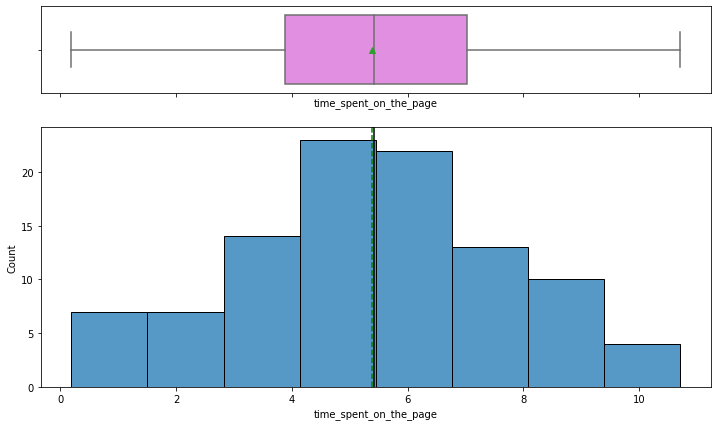

In [10]:
histogram_boxplot(df, 'time_spent_on_the_page')

### Observations:
- More than 20 people spent between 4 to 6 minutes on the page.
- This shows that more people spent between 4 to 6 minutes. 
- The data seems to follow a normal distribution as seen on the barplot/histogram.

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

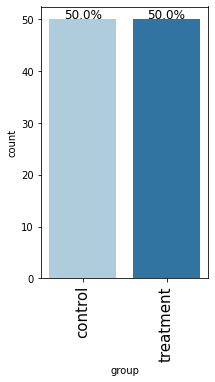

In [12]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'group', perc=True)

### Observations:
- The feature "group" has 2 unique values control and treatment groups. The groups are split in half. 
- 50 in the control group and 50 in the treatment group.

<Figure size 720x504 with 0 Axes>

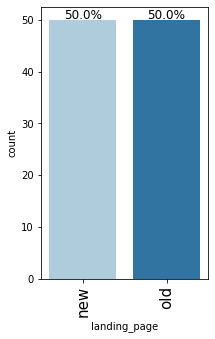

In [14]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'landing_page', perc=True)

### Observations: 
- The column "landing page" also has 2 unique values old and new landing page. 
- The data shows 50 observations for the old landing page and 50 observation for the new landing page.

<Figure size 720x504 with 0 Axes>

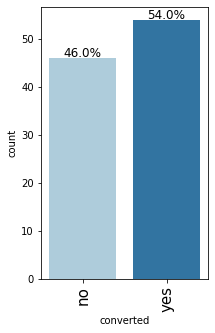

In [15]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'converted', perc=True)

### Observations:
The column "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54 
and no(converted) with 46.

<Figure size 720x504 with 0 Axes>

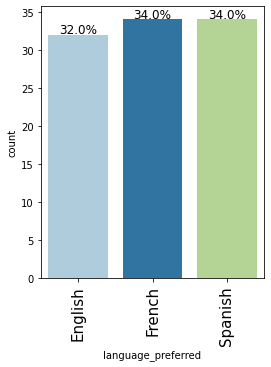

In [16]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'language_preferred', perc=True)

### Observations:
The column "language preferred" has 3 unique values spanish, english, and french, with both french and spanish 
having the highest frequencies of 34. English is having the frquency of 32. 
So out of 100 people 34% people land on Spanish, French and 32% is for English.

## Bivariate Analysis

<AxesSubplot:xlabel='group', ylabel='time_spent_on_the_page'>

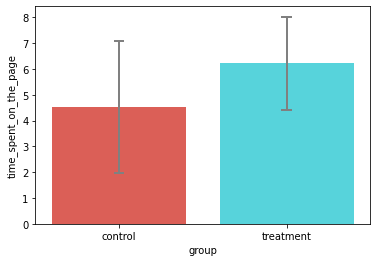

In [17]:
sns.barplot(x = 'group', y = 'time_spent_on_the_page', data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

### Observations:
The treatment group(those exposed to the new landing page) are more likely to spend more time on the new page.

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

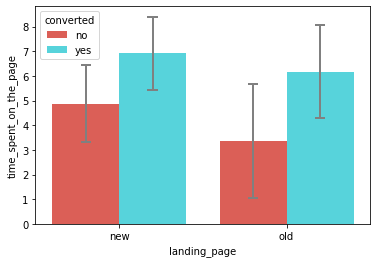

In [18]:
sns.barplot(x = 'landing_page', y = 'time_spent_on_the_page', hue = 'converted', data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [19]:
df.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

### Observations:
The above plot and the mean time shows that what ever be the landing page users first landed on, 
the time spent seems higher when they landed on the new landing page.

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

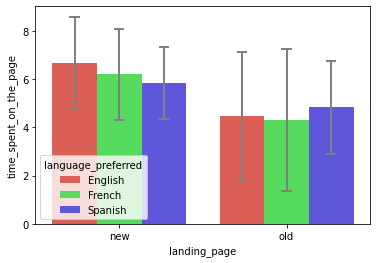

In [20]:
sns.barplot(x = 'landing_page', y = 'time_spent_on_the_page', hue = 'language_preferred', data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

### Observations:
What ever may be the language preferred users who landed on the new landing page spent more time compared to the old page.

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

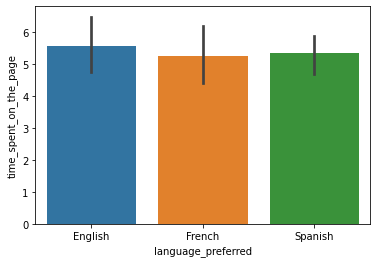

In [21]:
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')

In [22]:
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

### Observations:
Among the different languages English, French, and Spanish the average time spent on the page seems relatively the same.

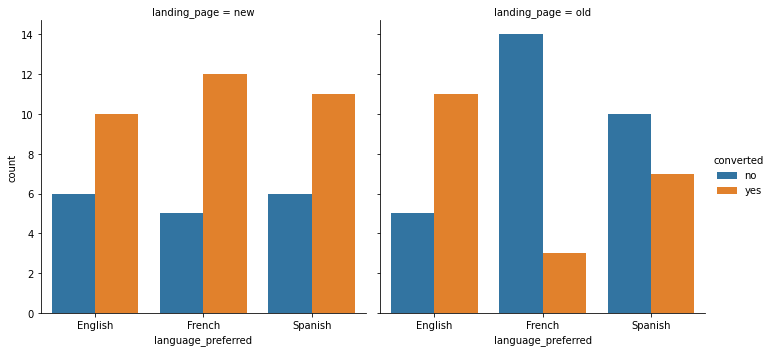

In [23]:
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count')

## Observations:
French and Spanish speaking users are less likely to convert to the new landing page if first exposed to the old landing page.
Whereas, if they are first exposed to the new landing page they are more likely to convert.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

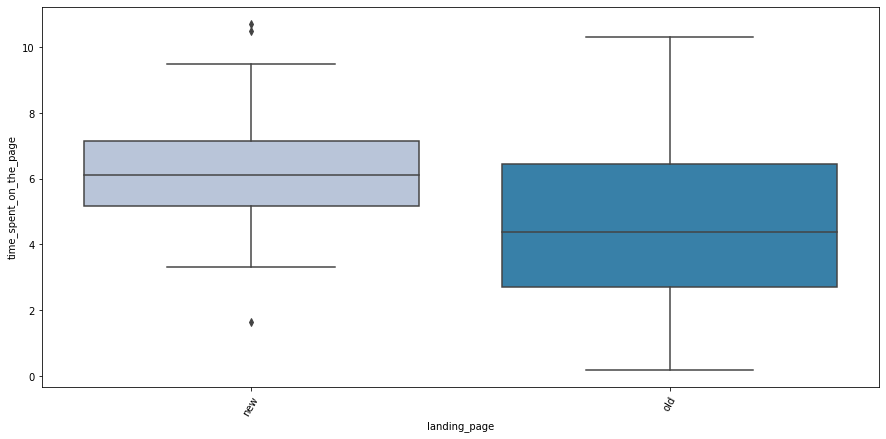

In [24]:
# Relationship between spending time on the type of  landing page
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

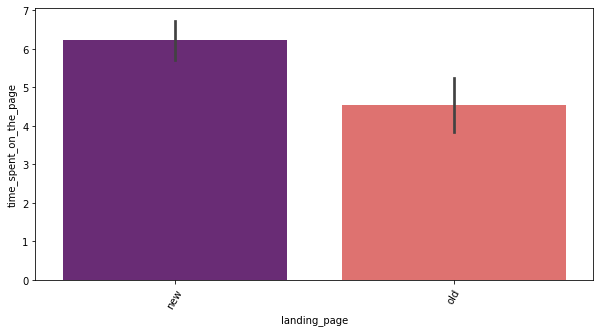

In [25]:
# Relationship between spending time on the type of  landing page
plt.figure(figsize=(10,5))
sns.barplot(x = "landing_page", y = "time_spent_on_the_page", data = df, palette = 'magma')
plt.xticks(rotation = 60)
plt.show()

In [26]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

### Observations:
On average users seem to spend more time on the new page than on the old page.

### Step 1: Define the null and alternate hypotheses

Let mu1, mu2 be the mean time spent on the old landing page vs the mean time spent on the new landing page.

The above formulated hypotheses can be written as:

>$H_0:$ 𝜇1=𝜇2

>$H_a:$ 𝜇1<𝜇2



### Step 2: Select Appropriate test

This is a case of a one-tailed two-sample mean test. As the two samples are not independent in this case, and also the population standard deviations are unknown, 
we shall use a paired t-test for this problem.

#### Let's test whether the paired T-test assumptions are satisfied or not

- Continuous data - Yes, the time spent on the page is measured on a continuous scale.
- Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
- Independent observations - As we are taking the sampled unit randomly, the observed units are independent.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
- The dependent variable should not contain any outliers - Yes, time spent on the old page does not contain any outliers

### Step 3: Decide the significance level

As given in the problem statement, we select  alpha = 0.05.

### Step 4: Collect and prepare data

In [27]:
mu1 = df[df['landing_page']=='old']['time_spent_on_the_page']
mu2 = df[df['landing_page']=='new']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [28]:
#import the required functions
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value  = ttest_rel(mu1, mu2, alternative = 'less')  #Performing a paired t-test

print('The p-value is', p_value)

The p-value is 0.00029910900937037973


### Step 6: Compare the p-value with $\alpha$

In [29]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the new landing page encourages users to spend more time than on the old landing page.

The test leads to a conclusion: 
In this scenario, the p value is 0.0003 which is less than the 0.05. Hence, we reject the null hypothesis.

This means that the new landing page encourages users to spend more time significantly.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

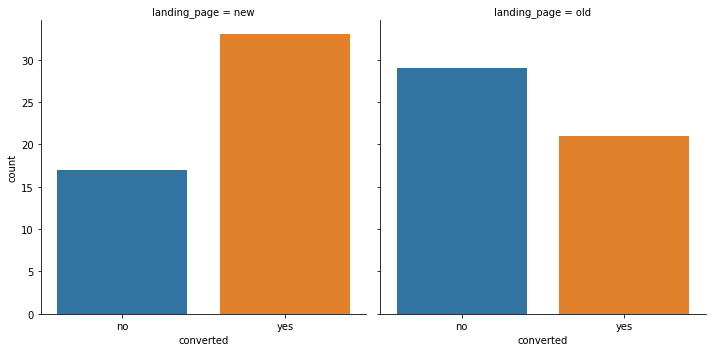

In [30]:
sns.catplot(data = df, x = 'converted', col = 'landing_page', kind = 'count')

### Observation:
Users engaging with the new landing page are more likely to convert than those using the old landing page.


### Step 1: Define the null and alternate hypotheses

Let p1 and p2  be the proportions of converters in old landing page and new landing page respectively.

Null Hypothesis: $H_0:$ p1 = p2

Alternate Hypothesis:  $H_a:$ p1 ≠ p2   

### Step 2: Select Appropriate test
- Z-test assumptions:
- Binomally distributed population - Yes, a product is either converted or not-converted.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
- Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. 
- The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

- 𝑛𝑝1$=$ 50 x 21/50$=$21$≥$10
- 𝑛(1−𝑝1)$=$50 x 50$−$21/50$=$29$≥$10

- 𝑛𝑝2=50 x 33/50=33≥10
- 𝑛(1−𝑝2)=50 x 50−33/50=17≥10

### Step 3:Decide the significance level

As given in the problem statement, we select alpha = 0.05.

### Step 4: Collect and prepare data

In [31]:
#find the number of users who converted among both groups, old landing page and new landing page

df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

### Step 5: Calculate the p-value

In [32]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converters
converter_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converter_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with  𝛼

In [33]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw Inference
At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the conversion rate among 
the two groups, old landing page and new landing page are different.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

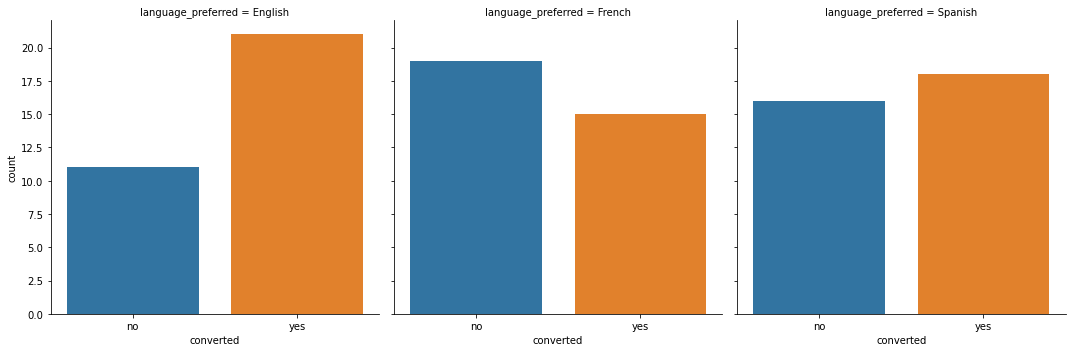

In [34]:
sns.catplot(data = df, x = 'converted', col = 'language_preferred', kind = 'count')

### Observation:
    Users who converted do not seem to have much effected on which language page they preferred for Spanish and French speaking users.
    But it does play a significant role with English speaking users.
    


### Step 1: Define the null and alternate hypotheses
We will test the null hypothesis

 >$H_0:$ Converted status is independent of language preferred.

against the alternate hypothesis

 >$H_a:$ Converted status depends on language preferred.

### Step 2: Select Appropriate test

#### Let's test whether the assumptions for Chi-Square Test for Independence are satisfied or not
- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level
As given in the problem statement, we select alpha = 0.05.

### Step 4: Collect and prepare data

In [35]:
df1 = df[["converted", "language_preferred"]]
df1.head()

,converted,language_preferred
0,no,Spanish
1,yes,English
2,no,Spanish
3,no,French
4,yes,Spanish


In [36]:
df2 = pd.crosstab(df1['converted'], df1['language_preferred'])
df2

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [37]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df2)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with  𝛼

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw Inference
At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that converted status depends on language preferrence.

What conclusion does the test lead to?
In this hypothesis, the p value is 0.213 which is greater than the 0.05. Hence, we fail to reject the null hypothesis.

This means that the converted status is independent of language preferred.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Collect and prepare data

In [39]:
df3 = df[df["landing_page"] == 'new']
df3.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [40]:
df3['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

In [41]:
df3.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Perform Visual Analysis

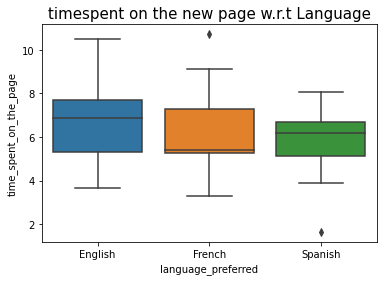

In [42]:
a = sns.boxplot(data = df3, x = 'language_preferred', y = 'time_spent_on_the_page')
a.set_title("timespent on the new page w.r.t Language", fontsize=15)
plt.show()

### Observation:
The average time spent on the pages seems relatively the same among the different language preferences.

### Select Appropriate test

This is a problem, concerning three population means. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

#### We will test the null hypothesis

 >$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

 >$H_a:$ Time spent on the new page does not follow a normal distribution

In [43]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df3['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

 We will test the null hypothesis

 >$H_0$: All the population variances are equal

 against the alternative hypothesis

 >$H_a$: At least one variance is different from the rest

In [44]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df3[df3['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df3[df3['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df3[df3['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied for One-way ANOVA Test or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Step 1: Define the null and alternate hypotheses

Let 𝜇1,𝜇2,𝜇3 be the means of time spent on the new landing page for language preferences English, Spanish and French respectively.

We will test the null hypothesis:
    
   H0 : 𝜇1=𝜇2=𝜇3  

against the alternative hypothesis

   Ha :  At least one time average of the new landing page is different among the language preferences.



### Step 2: Decide the significance level
As given in the problem statement, we select alpha = 0.05.

### Step 3: Calculate the p-value

In [45]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df3.loc[df3['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df3.loc[df3['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df3.loc[df3['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 4: Compare the p-value with  𝛼

In [46]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 5: Draw Inference
At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence 
to say that at least one time average on the new landing page is different among the language preferences.

What conclusion does the test lead to?
In this scenario, the p value is 0.432 which is greater than the 0.05. Hence, we fail to reject the null hypothesis.

This means that the mean time spent on the new landing page for the different languages are relatively the same.

## Conclusion and Business Recommendations

### Conclusions:

Analyzed dataset of nearly 100 users, categorized into two groups: first group (control) and the second group (treatment).
The main feature of interest here is to analyze to find out whether the new subscribers are attracted based on adding the new feature to the new landing page.

Adding the new feature to the new landing page seems to be more effective.
The data shows that users spent more time on the new landing page compared to the old landing page.
Based on my observation time spent on the new landing page seems to be relatively same among different language users.

### Recommendations to business:

Adding the new feature on the new landing page is more effective, based on this the new feature on the new landing page is recommended.
Data shows that English language users are more subscribed by landing on new page compared to French and Spanish.
I recommend adding a suitable feature to new landing page which attracts French and Spanish users as a candidate for new subscribers.


